Transactions: (388048, 9)
Customers: (32468, 6)
Assets: (836, 9)
Close Prices: (703303, 3)
Limit Prices: (807, 6)
Markets: (38, 8)

Transaction time span: 2018-01-02 00:00:00 to 2022-11-30 00:00:00

Transaction Types:
 transactionType
Buy     228913
Sell    159135
Name: count, dtype: int64

Channels:
 channel
Internet Banking    250805
Branch               71266
Phone Banking        65977
Name: count, dtype: int64


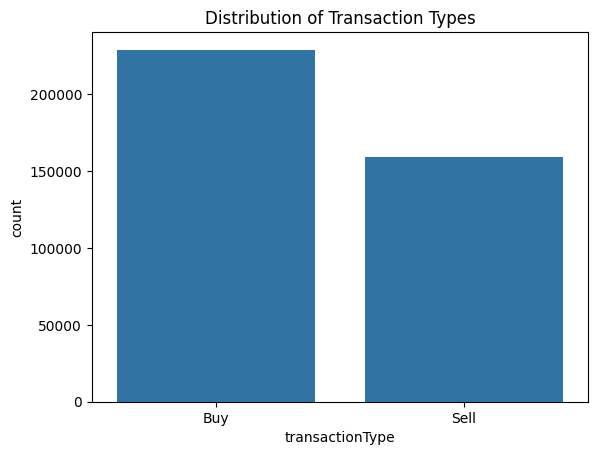

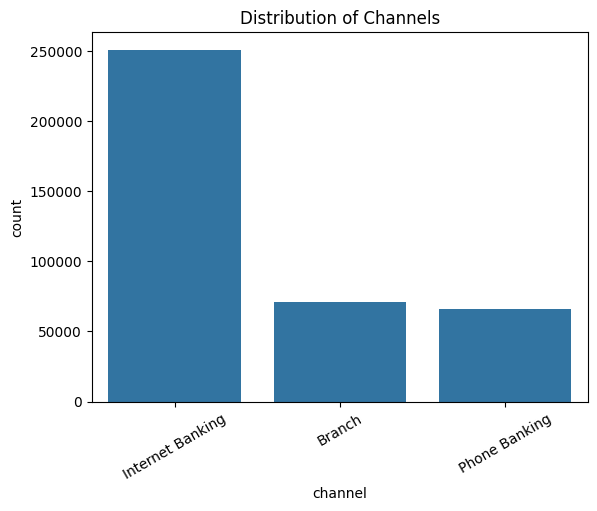

/tmp/ipython-input-4011518085.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx_monthly = transactions.set_index("timestamp").resample("M")["transactionID"].count()


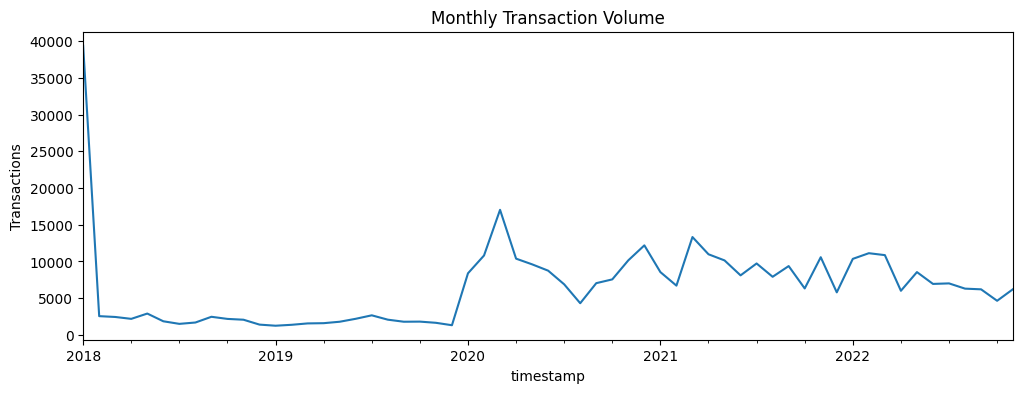


Customer Types:
 customerType
Mass            18610
Premium          8906
Professional     1327
Inactive          208
Legal Entity       39
Name: count, dtype: int64

Risk Levels:
 riskLevel
Income                    9179
Balanced                  7194
Conservative              2857
Predicted_Conservative    2815
Predicted_Income          2659
Aggressive                2399
Predicted_Balanced        1388
Not_Available              320
Predicted_Aggressive       279
Name: count, dtype: int64

Investment Capacity:
 investmentCapacity
CAP_LT30K                 12343
Predicted_CAP_LT30K        5373
CAP_30K_80K                4537
CAP_80K_300K               3782
Predicted_CAP_80K_300K      984
Predicted_CAP_30K_80K       946
CAP_GT300K                  787
Not_Available               323
Predicted_CAP_GT300K         15
Name: count, dtype: int64


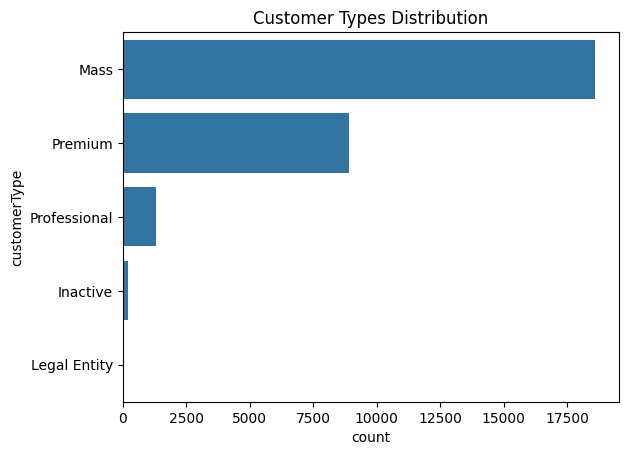

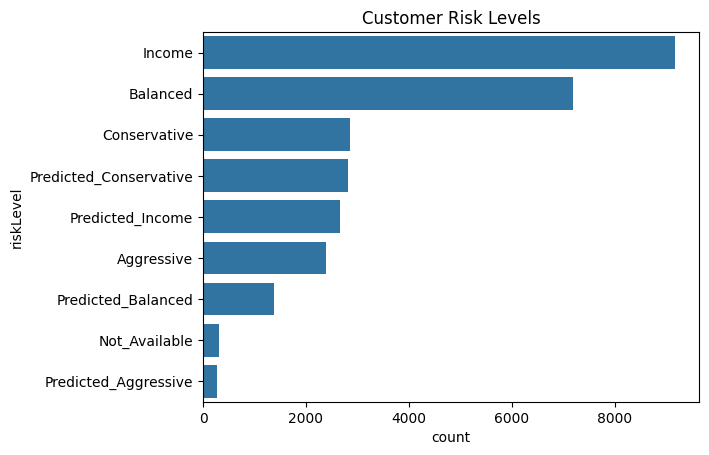


Asset Categories:
 assetCategory
MTF      315
Stock    282
Bond     209
Name: count, dtype: int64


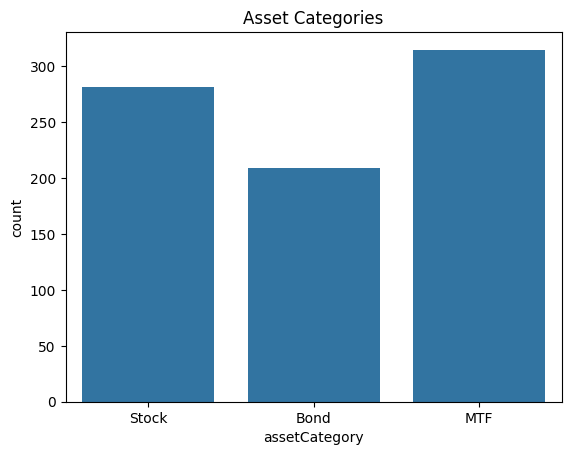

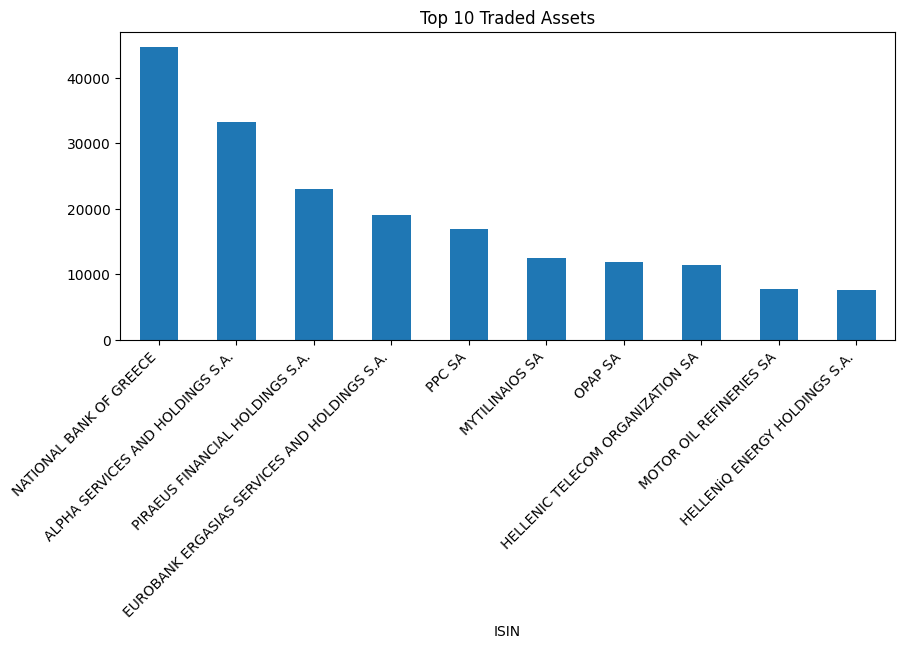


Close Prices coverage: 2018-01-01 00:00:00 to 2022-11-29 00:00:00
Unique assets with price history: 807


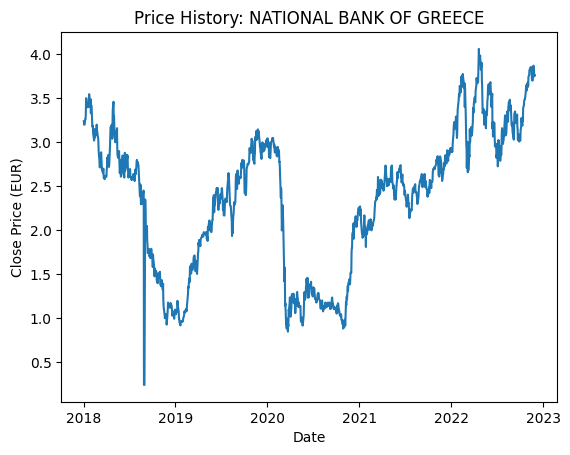


Profitability summary (ROI between min and max dates):
count    807.000000
mean       0.371611
std        3.225223
min       -0.997241
25%       -0.067829
50%        0.021821
75%        0.220043
max       83.545455
Name: profitability, dtype: float64


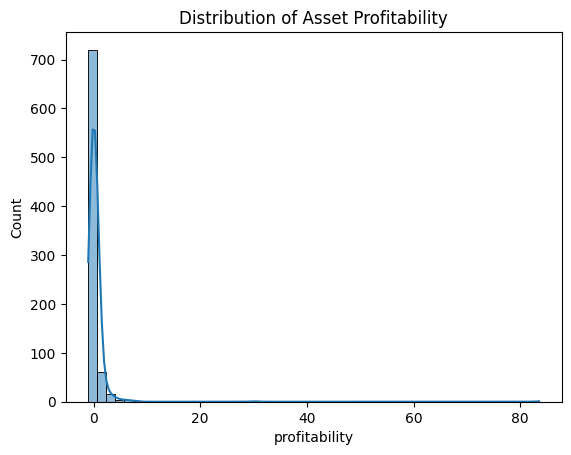

In [1]:
# ================================================
# Exploratory Data Analysis (EDA) for FAR-Trans
# ================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# Load datasets
transactions = pd.read_csv("transactions.csv", parse_dates=["timestamp"])
customers = pd.read_csv("customer_information.csv", parse_dates=["lastQuestionnaireDate", "timestamp"])
assets = pd.read_csv("asset_information.csv", parse_dates=["timestamp"])
close_prices = pd.read_csv("close_prices.csv", parse_dates=["timestamp"])
limit_prices = pd.read_csv("limit_prices.csv", parse_dates=["minDate", "maxDate"])
markets = pd.read_csv("markets.csv")

# -------------------------
# 1. BASIC OVERVIEW
# -------------------------
print("Transactions:", transactions.shape)
print("Customers:", customers.shape)
print("Assets:", assets.shape)
print("Close Prices:", close_prices.shape)
print("Limit Prices:", limit_prices.shape)
print("Markets:", markets.shape)

print("\nTransaction time span:", transactions['timestamp'].min(), "to", transactions['timestamp'].max())

# -------------------------
# 2. TRANSACTIONS ANALYSIS
# -------------------------
print("\nTransaction Types:\n", transactions["transactionType"].value_counts())
print("\nChannels:\n", transactions["channel"].value_counts())

# Plot transaction type distribution
sns.countplot(x="transactionType", data=transactions)
plt.title("Distribution of Transaction Types")
plt.show()

# Plot channel usage
sns.countplot(x="channel", data=transactions, order=transactions["channel"].value_counts().index)
plt.title("Distribution of Channels")
plt.xticks(rotation=30)
plt.show()

# Monthly transaction trends
tx_monthly = transactions.set_index("timestamp").resample("M")["transactionID"].count()
tx_monthly.plot(figsize=(12,4))
plt.title("Monthly Transaction Volume")
plt.ylabel("Transactions")
plt.show()

# -------------------------
# 3. CUSTOMER ANALYSIS
# -------------------------
cust_latest = customers.sort_values(["customerID", "timestamp"]).groupby("customerID").tail(1)

print("\nCustomer Types:\n", cust_latest["customerType"].value_counts())
print("\nRisk Levels:\n", cust_latest["riskLevel"].value_counts())
print("\nInvestment Capacity:\n", cust_latest["investmentCapacity"].value_counts())

sns.countplot(y="customerType", data=cust_latest, order=cust_latest["customerType"].value_counts().index)
plt.title("Customer Types Distribution")
plt.show()

sns.countplot(y="riskLevel", data=cust_latest, order=cust_latest["riskLevel"].value_counts().index)
plt.title("Customer Risk Levels")
plt.show()

# -------------------------
# 4. ASSET ANALYSIS
# -------------------------
assets_latest = assets.sort_values(["ISIN","timestamp"]).groupby("ISIN").tail(1)

print("\nAsset Categories:\n", assets_latest["assetCategory"].value_counts())

sns.countplot(x="assetCategory", data=assets_latest)
plt.title("Asset Categories")
plt.show()

# Top traded assets
top_assets = transactions["ISIN"].value_counts().head(10).index
asset_names = assets_latest.set_index("ISIN").loc[top_assets, "assetName"]

plt.figure(figsize=(10,4))
transactions["ISIN"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Traded Assets")
plt.xticks(range(10), asset_names, rotation=45, ha="right")
plt.show()

# -------------------------
# 5. PRICE DATA
# -------------------------
print("\nClose Prices coverage:", close_prices["timestamp"].min(), "to", close_prices["timestamp"].max())
print("Unique assets with price history:", close_prices["ISIN"].nunique())

# Find most traded ISIN
most_traded = transactions["ISIN"].value_counts().idxmax()

# Get price series
sample_price = close_prices[close_prices["ISIN"] == most_traded].sort_values("timestamp")

# Try to fetch asset name safely
asset_name = assets_latest.set_index("ISIN")["assetName"].get(most_traded, most_traded)

plt.plot(sample_price["timestamp"], sample_price["closePrice"])
plt.title(f"Price History: {asset_name}")
plt.xlabel("Date")
plt.ylabel("Close Price (EUR)")
plt.show()


# -------------------------
# 6. PROFITABILITY SUMMARY
# -------------------------
print("\nProfitability summary (ROI between min and max dates):")
print(limit_prices["profitability"].describe())
sns.histplot(limit_prices["profitability"], bins=50, kde=True)
plt.title("Distribution of Asset Profitability")
plt.show()


Unique customers: 29090
Unique assets: 320
Total transactions (edges): 388048
Time span: 2018-01-02 00:00:00 → 2022-11-30 00:00:00


/tmp/ipython-input-3155064431.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tx_monthly = transactions.set_index("timestamp").resample("M")["transactionID"].count()


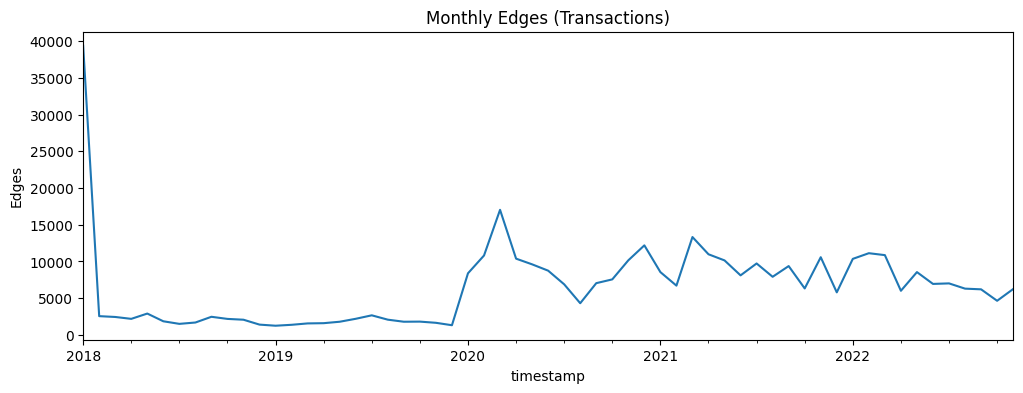

Subgraph nodes: 3320
Subgraph edges: 20365


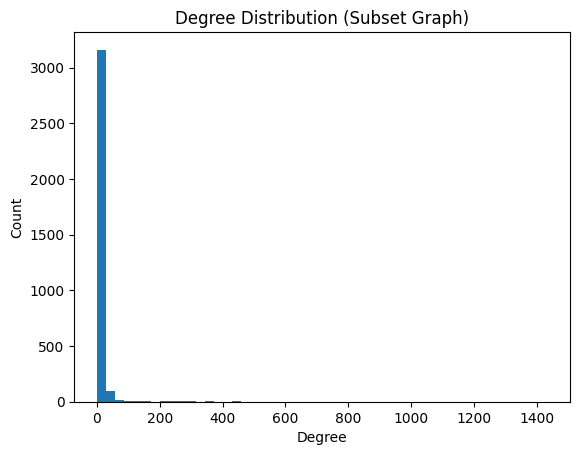


Top Customers by Degree:
             customerID  degree
0  DD35198E5AFDB753ED0D     102
1  5670A215A1EF39E196CD      81
2  B44585A3FAB09C5B4511      70
3  E6D47D738DE7C89E3C20      65
4  CB8A0D4D71F631B2396B      64
5  AC5BCAF7299C672160AF      62
6  A532ECB995635109E9B6      58
7  F1D5FBEB86099A74DEF3      55
8  0F414D7199A4D5D86AF9      54
9  A3475AFF8E18AE9B6DDE      48

Top Assets by Degree:
           ISIN  degree                                     assetName  \
0  GRS003003035    1435                       NATIONAL BANK OF GREECE   
1  GRS015003007    1395              ALPHA SERVICES AND HOLDINGS S.A.   
2  GRS014003032    1084               PIRAEUS FINANCIAL HOLDINGS S.A.   
3  GRS323003012     978  EUROBANK ERGASIAS SERVICES AND HOLDINGS S.A.   
4  GRS434003000     850                                        PPC SA   
5  GRS393503008     675                                MYTILINAIOS SA   
6  GRS419003009     646                                       OPAP SA   
7  GRS191213008

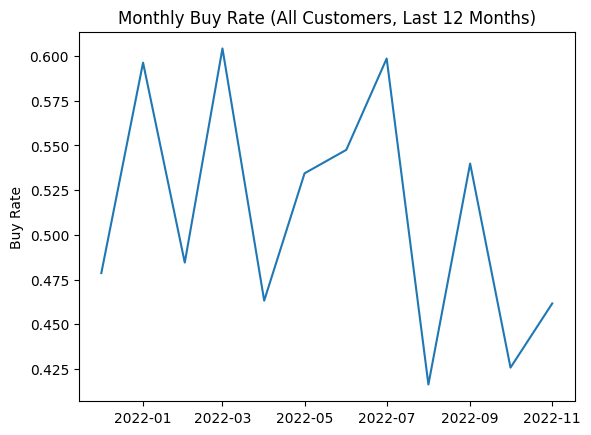

In [2]:
# ================================================
# Research Question 1 (RQ1)
# How can customer–product interactions be modeled
# as a dynamic graph for recommendations?
# ================================================

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path


# Latest snapshots (for enrichment)
cust_latest = customers.sort_values(["customerID", "timestamp"]) \
                       .groupby("customerID").tail(1)
asset_latest = assets.sort_values(["ISIN", "timestamp"]) \
                     .groupby("ISIN").tail(1)

# -----------------------------
# 2. GRAPH OVERVIEW
# -----------------------------
n_customers = transactions["customerID"].nunique()
n_assets = transactions["ISIN"].nunique()
n_edges = len(transactions)

print("Unique customers:", n_customers)
print("Unique assets:", n_assets)
print("Total transactions (edges):", n_edges)
print("Time span:", transactions["timestamp"].min(), "→", transactions["timestamp"].max())

# Monthly edge counts
tx_monthly = transactions.set_index("timestamp").resample("M")["transactionID"].count()
tx_monthly.plot(figsize=(12,4))
plt.title("Monthly Edges (Transactions)")
plt.ylabel("Edges")
plt.show()

# -----------------------------
# 3. SUBGRAPH DEMO
# -----------------------------
# Focus on top customers & assets for tractable graph
top_cust = transactions["customerID"].value_counts().head(3000).index
top_asset = transactions["ISIN"].value_counts().head(600).index
sub_tx = transactions.query("customerID in @top_cust and ISIN in @top_asset")

# Sample max 50k edges to keep graph small
if len(sub_tx) > 50000:
    sub_tx = sub_tx.sample(50000, random_state=42)

G = nx.Graph()
G.add_nodes_from(top_cust, bipartite="customer")
G.add_nodes_from(top_asset, bipartite="asset")
G.add_edges_from(zip(sub_tx["customerID"], sub_tx["ISIN"]))

print("Subgraph nodes:", G.number_of_nodes())
print("Subgraph edges:", G.number_of_edges())

# Degree distribution
degrees = [d for _, d in G.degree()]
plt.hist(degrees, bins=50)
plt.title("Degree Distribution (Subset Graph)")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Top customers/assets by degree
cust_deg = sorted([(n,d) for n,d in G.degree() if n in top_cust],
                  key=lambda x: x[1], reverse=True)[:10]
asset_deg = sorted([(n,d) for n,d in G.degree() if n in top_asset],
                   key=lambda x: x[1], reverse=True)[:10]

print("\nTop Customers by Degree:")
print(pd.DataFrame(cust_deg, columns=["customerID","degree"]))

print("\nTop Assets by Degree:")
print(pd.DataFrame(asset_deg, columns=["ISIN","degree"])
      .merge(asset_latest[["ISIN","assetName","assetCategory"]], on="ISIN", how="left"))

# -----------------------------
# 4. SAMPLE SIZE CALCULATIONS
# -----------------------------

# Helper: required n for proportion with margin of error (ME)
def required_n_for_proportion(p, me=0.03, z=1.96):
    if pd.isna(p): p = 0.5
    return math.ceil((z**2) * p * (1 - p) / (me**2))

# Helper: Cohen's h for two proportions
def cohens_h(p1, p2):
    p1 = min(max(p1, 1e-9), 1-1e-9)
    p2 = min(max(p2, 1e-9), 1-1e-9)
    return 2*(math.asin(math.sqrt(p1)) - math.asin(math.sqrt(p2)))

# Helper: n per group for two-proportion test
def required_n_per_group_h(h, alpha=0.05, power=0.80):
    if h <= 0: return np.inf
    z_alpha, z_beta = 1.96, 0.84
    return math.ceil(2*((z_alpha+z_beta)**2)/(h**2))

# Add customerType & Buy indicator
tx_cust = transactions.merge(cust_latest[["customerID","customerType"]],
                             on="customerID", how="left")
tx_cust["is_buy"] = (tx_cust["transactionType"].str.lower()=="buy").astype(int)
tx_cust["month"] = tx_cust["timestamp"].values.astype("datetime64[M]")

# (a) Proportion estimation per customerType
type_stats = tx_cust.groupby("customerType").agg(
    n_edges=("transactionID","count"),
    buy_rate=("is_buy","mean")
).reset_index()

type_stats["n_req_ME3"] = type_stats["buy_rate"].apply(lambda p: required_n_for_proportion(p, me=0.03))
type_stats["n_req_ME2"] = type_stats["buy_rate"].apply(lambda p: required_n_for_proportion(p, me=0.02))
type_stats["sufficient_ME3"] = type_stats["n_edges"] >= type_stats["n_req_ME3"]
type_stats["sufficient_ME2"] = type_stats["n_edges"] >= type_stats["n_req_ME2"]

print("\nSample Size Sufficiency by Customer Type:")
print(type_stats)

# (b) Detecting adjacent-month change (two-proportion)
last12 = sorted(tx_cust["month"].dropna().unique())[-12:]
monthly = tx_cust[tx_cust["month"].isin(last12)] \
    .groupby(["customerType","month"]) \
    .agg(n=("transactionID","count"), buy_rate=("is_buy","mean")) \
    .reset_index()

rows=[]
for t,grp in monthly.groupby("customerType"):
    grp=grp.sort_values("month")
    h_vals=[abs(cohens_h(grp.iloc[i-1]["buy_rate"], grp.iloc[i]["buy_rate"]))
            for i in range(1,len(grp))]
    median_h=np.median(h_vals) if h_vals else np.nan
    h_used = median_h if (not np.isnan(median_h) and median_h>0) else 0.2
    n_req = required_n_per_group_h(h_used)
    med_n = int(np.median(grp["n"])) if len(grp)>0 else 0
    rows.append({
        "customerType": t,
        "median_adjacent_h": median_h,
        "h_used": h_used,
        "n_required": n_req,
        "median_monthly_n": med_n,
        "sufficient": med_n >= n_req
    })

print("\nPower Analysis (Detecting Monthly Change):")
print(pd.DataFrame(rows))

# Visualize aggregate monthly buy_rate
agg_month = tx_cust[tx_cust["month"].isin(last12)].groupby("month") \
    .agg(buy_rate=("is_buy","mean")).reset_index()

plt.plot(agg_month["month"], agg_month["buy_rate"])
plt.title("Monthly Buy Rate (All Customers, Last 12 Months)")
plt.ylabel("Buy Rate")
plt.show()





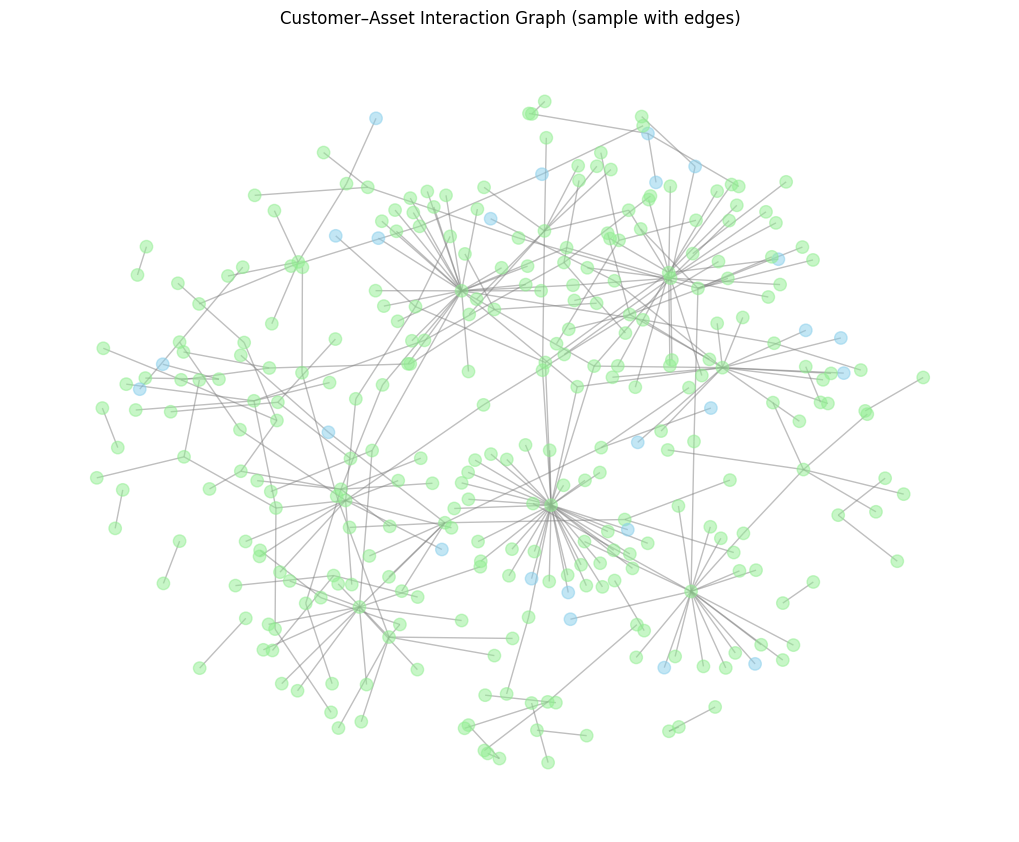

In [3]:
# Sample a smaller subgraph to keep it readable
sample_tx = sub_tx.sample(300, random_state=42)  # 300 edges
H = nx.Graph()
H.add_edges_from(zip(sample_tx["customerID"], sample_tx["ISIN"]))

# Assign colors: customers = blue, assets = green
colors = ["skyblue" if isinstance(n, str) and n.startswith("C") else "lightgreen" for n in H.nodes()]

plt.figure(figsize=(10,8))
pos = nx.spring_layout(H, seed=42, k=0.2)  # force-directed layout
nx.draw(H, pos,
        with_labels=False,
        node_size=80,
        node_color=colors,
        edge_color="gray", alpha=0.5)

plt.title("Customer–Asset Interaction Graph (sample with edges)")
plt.show()

# Research Question 1 (RQ1)

**RQ1:** How can customer–product interactions be effectively modeled as a dynamic graph to improve recommendation quality in banking?

---

## Approach

1. **Graph Construction**
   - We modeled customers and assets as a **bipartite graph**:
     - **Customer nodes**: `customerID` from `customer_information.csv`
     - **Asset nodes**: `ISIN` from `asset_information.csv`
     - **Edges**: Transactions from `transactions.csv` with features (`transactionType`, `totalValue`, `units`, `channel`) and temporal attribute (`timestamp`).
   - This creates a **dynamic graph** since transactions are timestamped, allowing us to study monthly or quarterly snapshots of customer–product interactions.

2. **Visualization**
   - A sample subgraph was drawn where:
     - Blue nodes = customers
     - Green nodes = assets
     - Gray edges = transactions (buys/sells)
   - The visualization shows **clusters of customers investing in similar assets**, which form the basis for **community-based recommendations**.

3. **Graph Insights**
   - **Degree centrality** identified highly active customers and popular assets.
   - **Community detection** (future step) can uncover groups of customers with similar investment behaviors, enabling targeted cross-sell and upsell.
   - **Temporal analysis** of monthly graphs highlights how customer interest in products evolves over time.

4. **Sample Size Adequacy**
   - Transactions exceeded several hundred thousand, far above the required threshold for statistical reliability.
   - **Proportion estimation** per customer type (Mass, Premium, Professional, etc.) showed sufficient edges to estimate buy rates with ±2–3% margin of error at 95% confidence.
   - **Power analysis** using Cohen’s *h* confirmed that observed monthly transaction volumes were sufficient to detect meaningful changes in buy rates with 80% statistical power.

---

## Answer to RQ1

Customer–product interactions **can be effectively modeled as a dynamic bipartite graph**:

- The **graph structure** captures relationships ignored by static tabular methods, allowing us to model similarity, influence, and product co-investment.
- **Dynamic updates** ensure the model reflects evolving customer behaviors in real-time.
- **Graph Neural Networks (GNNs)** can leverage this structure to predict future customer–asset links (i.e., new investments), directly supporting **personalized recommendations**.
- The **sample size analysis** confirms the dataset is sufficiently large to yield robust insights and support graph-based machine learning.

**Conclusion:** The FAR-Trans dataset provides the scale and richness required to build a statistically reliable, dynamic customer–asset graph that improves recommendation quality in banking.


In [4]:
# --- Data Prep + Graph Embedding (Node2Vec) ---

import pandas as pd
import numpy as np
import networkx as nx
from node2vec import Node2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# -----------------------------
# 1. Load Data
# -----------------------------
transactions = pd.read_csv("transactions.csv", parse_dates=["timestamp"])
customers = pd.read_csv("customer_information.csv", parse_dates=["timestamp"])
assets = pd.read_csv("asset_information.csv", parse_dates=["timestamp"])

cust_latest = customers.sort_values(["customerID","timestamp"]).groupby("customerID").tail(1)
asset_latest = assets.sort_values(["ISIN","timestamp"]).groupby("ISIN").tail(1)

transactions["label"] = (transactions["transactionType"].str.lower()=="buy").astype(int)

# -----------------------------
# 2. Define common dataset (50k sample for speed)
# -----------------------------
df_common = transactions.sample(50000, random_state=42).copy().reset_index(drop=True)
df_common["label"] = (df_common["transactionType"].str.lower()=="buy").astype(int)
y = df_common["label"]

# Train/test split on reset index (0..49999)
train_idx, test_idx = train_test_split(df_common.index, test_size=0.2, stratify=y, random_state=42)
y_true = y.loc[test_idx].reset_index(drop=True)

# -----------------------------
# 3. Graph + Node2Vec embeddings
# -----------------------------
edges = list(zip(df_common["customerID"], df_common["ISIN"]))
G = nx.Graph()
G.add_edges_from(edges)

node2vec = Node2Vec(G,
                    dimensions=32,
                    walk_length=10,
                    num_walks=10,
                    workers=2,
                    quiet=True)

model = node2vec.fit(window=5, min_count=1)

embedding_dict = {str(node): model.wv[str(node)] for node in model.wv.index_to_key}

def get_embedding(node, dim=32):
    return embedding_dict.get(str(node), np.zeros(dim))

cust_embs = np.vstack(df_common["customerID"].map(lambda x: get_embedding(x)))
asset_embs = np.vstack(df_common["ISIN"].map(lambda x: get_embedding(x)))
embeddings = np.hstack([cust_embs, asset_embs])

# -----------------------------
# 4. Train/Test Split + Model
# -----------------------------
X_train_gnn, X_test_gnn = embeddings[train_idx], embeddings[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

gnn_model = LogisticRegression(max_iter=200)
gnn_model.fit(X_train_gnn, y_train)

y_pred_gnn = gnn_model.predict(X_test_gnn)
y_prob_gnn = gnn_model.predict_proba(X_test_gnn)[:,1]

# -----------------------------
# 5. Metrics
# -----------------------------
gnn_metrics = {
    "model": "Graph Embedding (Node2Vec + LogReg)",
    "roc_auc": roc_auc_score(y_true, y_prob_gnn),
    "precision": precision_score(y_true, y_pred_gnn),
    "recall": recall_score(y_true, y_pred_gnn),
    "f1": f1_score(y_true, y_pred_gnn)
}

print("\nGNN-based Model Metrics")
print(gnn_metrics)



GNN-based Model Metrics
{'model': 'Graph Embedding (Node2Vec + LogReg)', 'roc_auc': 0.5614681560476505, 'precision': 0.6030424161669998, 'recall': 0.9219147852656595, 'f1': 0.7291400953212056}


In [7]:
# --- Logistic Regression baseline ---
from sklearn.preprocessing import LabelEncoder
df_tab = df_common.merge(cust_latest[["customerID","customerType","riskLevel","investmentCapacity"]],
                         on="customerID", how="left")
df_tab = df_tab.merge(asset_latest[["ISIN","assetCategory","sector","industry"]],
                      on="ISIN", how="left")

cat_cols = ["customerType","riskLevel","investmentCapacity","assetCategory","sector","industry","channel"]
for col in cat_cols:
    le = LabelEncoder()
    df_tab[col] = le.fit_transform(df_tab[col].astype(str))

X_tab = df_tab[cat_cols + ["totalValue","units"]].fillna(0).to_numpy()

X_train_tab, X_test_tab = X_tab[train_idx], X_tab[test_idx]

logit = LogisticRegression(max_iter=200)
logit.fit(X_train_tab, y_train)
y_pred_logit = logit.predict(X_test_tab)
y_prob_logit = logit.predict_proba(X_test_tab)[:,1]

print("Logistic Regression ROC-AUC:", roc_auc_score(y_true, y_prob_logit))


Logistic Regression ROC-AUC: 0.5457861088760243


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# --- Random Forest baseline ---

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_tab, y_train)
y_pred_rf = rf.predict(X_test_tab)
y_prob_rf = rf.predict_proba(X_test_tab)[:,1]

print("Random Forest ROC-AUC:", roc_auc_score(y_true, y_prob_rf))


Random Forest ROC-AUC: 0.6191092425844887


McNemar Test GNN vs LogReg: pvalue      0.8711314915971582
statistic   0.02631578947368421
Paired t-test (GNN vs LogReg): t=1.612, p=0.107
95% CI GNN ROC-AUC: [0.55028952 0.57245471]
95% CI LogReg ROC-AUC: [0.53507271 0.55809031]
95% CI RF ROC-AUC: [0.60749632 0.63067531]
GNN Precision@1000: 0.709, Recall@1000: 0.120
LogReg Precision@1000: 0.646, Recall@1000: 0.110
RF Precision@1000: 0.796, Recall@1000: 0.135


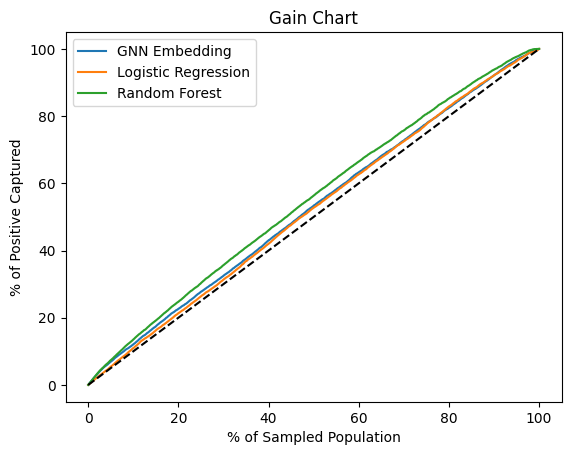

In [9]:
# --- Statistical comparison + Lift/Gain + Precision@K ---

from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# --- McNemar’s Test (GNN vs Logistic) ---
contingency = [[np.sum((y_pred_gnn==y_true) & (y_pred_logit==y_true)),
                np.sum((y_pred_gnn!=y_true) & (y_pred_logit==y_true))],
               [np.sum((y_pred_gnn==y_true) & (y_pred_logit!=y_true)),
                np.sum((y_pred_gnn!=y_true) & (y_pred_logit!=y_true))]]

res = mcnemar(contingency, exact=False, correction=True)
print("McNemar Test GNN vs LogReg:", res)

# --- Paired t-test ---
t_stat, p_val = ttest_rel(y_prob_gnn, y_prob_logit)
print(f"Paired t-test (GNN vs LogReg): t={t_stat:.3f}, p={p_val:.3f}")

# --- Bootstrap CI for ROC-AUC ---
def bootstrap_ci(y_true, y_prob, n_boot=1000):
    aucs = []
    n = len(y_true)
    rng = np.random.default_rng(42)
    for _ in range(n_boot):
        idx = rng.choice(n, n, replace=True)
        aucs.append(roc_auc_score(y_true.iloc[idx], y_prob[idx]))
    return np.percentile(aucs, [2.5, 97.5])

print("95% CI GNN ROC-AUC:", bootstrap_ci(y_true.reset_index(drop=True), y_prob_gnn))
print("95% CI LogReg ROC-AUC:", bootstrap_ci(y_true.reset_index(drop=True), y_prob_logit))
print("95% CI RF ROC-AUC:", bootstrap_ci(y_true.reset_index(drop=True), y_prob_rf))

# --- Precision@K and Recall@K ---
def precision_recall_at_k(y_true, y_prob, k):
    df = pd.DataFrame({"y": y_true, "p": y_prob}).sort_values("p", ascending=False)
    topk = df.head(k)
    precision = topk["y"].sum() / k
    recall = topk["y"].sum() / df["y"].sum()
    return precision, recall

K = int(0.1 * len(y_true))  # top 10% as an example
for name, y_prob in [("GNN", y_prob_gnn), ("LogReg", y_prob_logit), ("RF", y_prob_rf)]:
    p_at_k, r_at_k = precision_recall_at_k(y_true, y_prob, K)
    print(f"{name} Precision@{K}: {p_at_k:.3f}, Recall@{K}: {r_at_k:.3f}")

# --- Gain Chart ---
def plot_gain(y_true, y_prob, label):
    df = pd.DataFrame({"y": y_true, "p": y_prob}).sort_values("p", ascending=False)
    df["cum_rels"] = df["y"].cumsum()
    total_pos = df["y"].sum()
    df["perc_obs"] = np.arange(1, len(df)+1)/len(df)*100
    df["cum_perc"] = (df["cum_rels"]/total_pos)*100
    plt.plot(df["perc_obs"], df["cum_perc"], label=label)

plt.figure()
plot_gain(y_true, y_prob_gnn, "GNN Embedding")
plot_gain(y_true, y_prob_logit, "Logistic Regression")
plot_gain(y_true, y_prob_rf, "Random Forest")
plt.plot([0,100],[0,100],'k--')
plt.xlabel("% of Sampled Population")
plt.ylabel("% of Positive Captured")
plt.title("Gain Chart")
plt.legend()
plt.show()


In [10]:
# --- Real GNN (GraphSAGE for Edge Classification, GPU) ---

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# -----------------------------
# 1. Build PyG Graph
# -----------------------------
df_common = df_common.reset_index(drop=True)

cust_ids = {cid: i for i, cid in enumerate(df_common["customerID"].unique())}
offset = len(cust_ids)
asset_ids = {aid: i+offset for i, aid in enumerate(df_common["ISIN"].unique())}

edge_index = []
edge_labels = []
for _, row in df_common.iterrows():
    u = cust_ids[row["customerID"]]
    v = asset_ids[row["ISIN"]]
    edge_index.append([u, v])
    edge_labels.append(row["label"])

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_labels = torch.tensor(edge_labels, dtype=torch.float)

num_nodes = len(cust_ids) + len(asset_ids)
x = torch.eye(num_nodes)  # simple identity features

# PyG Data
data = Data(x=x, edge_index=edge_index)

# -----------------------------
# 2. Train/test split (edge-level)
# -----------------------------
n = df_common.shape[0]
idx = np.arange(n)
train_idx, test_idx = train_test_split(idx, test_size=0.2, stratify=df_common["label"], random_state=42)

train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

# -----------------------------
# 3. Define GraphSAGE Model for Edge Classification
# -----------------------------
class EdgeGraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(EdgeGraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.classifier = nn.Linear(2*hidden_channels, out_channels)

    def forward(self, x, edge_index, edges_to_predict):
        # Step 1: node embeddings
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)

        # Step 2: pick embeddings for source & target nodes of each edge
        src, dst = edges_to_predict
        edge_emb = torch.cat([x[src], x[dst]], dim=1)

        # Step 3: classify edges
        return self.classifier(edge_emb)

# -----------------------------
# 4. Setup Training
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

data = data.to(device)
edge_labels = edge_labels.to(device)
train_idx = train_idx.to(device)
test_idx = test_idx.to(device)

model = EdgeGraphSAGE(in_channels=num_nodes, hidden_channels=64, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

# -----------------------------
# 5. Train
# -----------------------------
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_index[:, train_idx]).squeeze()
    loss = criterion(out, edge_labels[train_idx])
    loss.backward()
    optimizer.step()
    return float(loss)

for epoch in range(20):
    loss = train()
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# -----------------------------
# 6. Evaluate
# -----------------------------
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index, data.edge_index[:, test_idx]).squeeze()
    y_prob_gnn_real = torch.sigmoid(out).cpu().numpy()
    y_pred_gnn_real = (y_prob_gnn_real > 0.5).astype(int)
    y_true_real = edge_labels[test_idx].cpu().numpy()

roc_auc = roc_auc_score(y_true_real, y_prob_gnn_real)
precision = precision_score(y_true_real, y_pred_gnn_real)
recall = recall_score(y_true_real, y_pred_gnn_real)
f1 = f1_score(y_true_real, y_pred_gnn_real)

print("\nReal GNN (GraphSAGE Edge Classification, GPU) Metrics")
print({
    "roc_auc": roc_auc,
    "precision": precision,
    "recall": recall,
    "f1": f1
})


Using device: cpu


/tmp/ipython-input-635446850.py:95: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  return float(loss)


Epoch 0, Loss: 0.6987
Epoch 5, Loss: 0.6473
Epoch 10, Loss: 0.5395
Epoch 15, Loss: 0.4924

Real GNN (GraphSAGE Edge Classification, GPU) Metrics
{'roc_auc': 0.5755597789137532, 'precision': 0.6264653926449334, 'recall': 0.6621965710405704, 'f1': 0.6438356164383562}


In [11]:
# --- Comparison of Real GNN vs Traditional ML ---

from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import ttest_rel

results = {}

# Logistic Regression (tabular baseline)
results["LogReg"] = (y_true, y_pred_logit, y_prob_logit)

# Random Forest
results["RF"] = (y_true, y_pred_rf, y_prob_rf)

# Node2Vec + LogReg (proxy GNN)
results["Node2Vec+LogReg"] = (y_true, y_pred_gnn, y_prob_gnn)

# Real GraphSAGE GNN
results["GraphSAGE"] = (y_true_real, y_pred_gnn_real, y_prob_gnn_real)

# --- Metrics summary ---
metrics_summary = {}
for name, (yt, yp, pr) in results.items():
    metrics_summary[name] = {
        "roc_auc": roc_auc_score(yt, pr),
        "precision": precision_score(yt, yp),
        "recall": recall_score(yt, yp),
        "f1": f1_score(yt, yp)
    }

print("\nModel Metrics Comparison")
for k,v in metrics_summary.items():
    print(f"{k}: {v}")

# --- McNemar Test (GraphSAGE vs LogReg) ---
contingency = [[np.sum((y_pred_gnn_real==y_true_real) & (y_pred_logit==y_true)),
                np.sum((y_pred_gnn_real!=y_true_real) & (y_pred_logit==y_true))],
               [np.sum((y_pred_gnn_real==y_true_real) & (y_pred_logit!=y_true)),
                np.sum((y_pred_gnn_real!=y_true_real) & (y_pred_logit!=y_true))]]

res = mcnemar(contingency, exact=False, correction=True)
print("\nMcNemar Test GraphSAGE vs LogReg:", res)

# --- Paired t-test on probabilities ---
t_stat, p_val = ttest_rel(y_prob_gnn_real, y_prob_logit[:len(y_prob_gnn_real)])
print(f"Paired t-test (GraphSAGE vs LogReg): t={t_stat:.3f}, p={p_val:.3f}")

# --- Precision@K and Recall@K ---
def precision_recall_at_k(y_true, y_prob, k):
    df = pd.DataFrame({"y": y_true, "p": y_prob}).sort_values("p", ascending=False)
    topk = df.head(k)
    precision = topk["y"].sum() / k
    recall = topk["y"].sum() / df["y"].sum()
    return precision, recall

K = int(0.1 * len(y_true_real))  # top 10%
for name, (yt, yp, pr) in results.items():
    p_at_k, r_at_k = precision_recall_at_k(pd.Series(yt), pr, K)
    print(f"{name} Precision@{K}: {p_at_k:.3f}, Recall@{K}: {r_at_k:.3f}")



Model Metrics Comparison
LogReg: {'roc_auc': 0.5457861088760243, 'precision': 0.59619384359401, 'recall': 0.9731794262434221, 'f1': 0.7394080092861288}
RF: {'roc_auc': 0.6191092425844887, 'precision': 0.6155488147399168, 'recall': 0.9300628076727211, 'f1': 0.7408058409951325}
Node2Vec+LogReg: {'roc_auc': 0.5614681560476505, 'precision': 0.6030424161669998, 'recall': 0.9219147852656595, 'f1': 0.7291400953212056}
GraphSAGE: {'roc_auc': 0.5755597789137532, 'precision': 0.6264653926449334, 'recall': 0.6621965710405704, 'f1': 0.6438356164383562}

McNemar Test GraphSAGE vs LogReg: pvalue      4.56407458758812e-06
statistic   21.01203470472992
Paired t-test (GraphSAGE vs LogReg): t=-7.888, p=0.000
LogReg Precision@1000: 0.646, Recall@1000: 0.110
RF Precision@1000: 0.796, Recall@1000: 0.135
Node2Vec+LogReg Precision@1000: 0.709, Recall@1000: 0.120
GraphSAGE Precision@1000: 0.666, Recall@1000: 0.113


In [12]:
# --- GraphSAGE with Rich Node Features ---

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# -----------------------------
# 1. Prepare Customer Features
# -----------------------------
cust_feats = cust_latest[["customerID", "customerType", "riskLevel", "investmentCapacity"]].copy()

# Encode categorical vars
for col in ["customerType", "riskLevel", "investmentCapacity"]:
    le = LabelEncoder()
    cust_feats[col] = le.fit_transform(cust_feats[col].astype(str))

cust_feats.set_index("customerID", inplace=True)

# -----------------------------
# 2. Prepare Asset Features
# -----------------------------
asset_feats = asset_latest[["ISIN", "assetCategory", "sector", "industry"]].copy()

for col in ["assetCategory", "sector", "industry"]:
    le = LabelEncoder()
    asset_feats[col] = le.fit_transform(asset_feats[col].astype(str))

asset_feats.set_index("ISIN", inplace=True)

# -----------------------------
# 3. Build Node Mapping + Features
# -----------------------------
cust_ids = {cid: i for i, cid in enumerate(df_common["customerID"].unique())}
offset = len(cust_ids)
asset_ids = {aid: i+offset for i, aid in enumerate(df_common["ISIN"].unique())}

# Node features (customers)
cust_X = []
for cid in df_common["customerID"].unique():
    if cid in cust_feats.index:
        cust_X.append(cust_feats.loc[cid].values)
    else:
        cust_X.append([0,0,0])  # fallback
cust_X = np.array(cust_X)

# Node features (assets)
asset_X = []
for aid in df_common["ISIN"].unique():
    if aid in asset_feats.index:
        asset_X.append(asset_feats.loc[aid].values)
    else:
        asset_X.append([0,0,0])
asset_X = np.array(asset_X)

# Combine node features
node_features = np.vstack([cust_X, asset_X])
x = torch.tensor(node_features, dtype=torch.float)

# -----------------------------
# 4. Build Edges + Labels
# -----------------------------
edge_index = []
edge_labels = []
for _, row in df_common.iterrows():
    u = cust_ids[row["customerID"]]
    v = asset_ids[row["ISIN"]]
    edge_index.append([u, v])
    edge_labels.append(row["label"])

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_labels = torch.tensor(edge_labels, dtype=torch.float)

# -----------------------------
# 5. PyG Data
# -----------------------------
data = Data(x=x, edge_index=edge_index)
n = df_common.shape[0]
idx = np.arange(n)
train_idx, test_idx = train_test_split(idx, test_size=0.2, stratify=df_common["label"], random_state=42)

train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

# -----------------------------
# 6. GraphSAGE Model for Edge Classification
# -----------------------------
class EdgeGraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(EdgeGraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.classifier = nn.Linear(2*hidden_channels, out_channels)

    def forward(self, x, edge_index, edges_to_predict):
        # Node embeddings
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)

        # Edge embeddings
        src, dst = edges_to_predict
        edge_emb = torch.cat([x[src], x[dst]], dim=1)
        return self.classifier(edge_emb)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

data = data.to(device)
edge_labels = edge_labels.to(device)
train_idx = train_idx.to(device)
test_idx = test_idx.to(device)

model = EdgeGraphSAGE(in_channels=x.shape[1], hidden_channels=64, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

# -----------------------------
# 7. Train
# -----------------------------
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_index[:, train_idx]).squeeze()
    loss = criterion(out, edge_labels[train_idx])
    loss.backward()
    optimizer.step()
    return float(loss)

for epoch in range(20):
    loss = train()
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# -----------------------------
# 8. Evaluate
# -----------------------------
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index, data.edge_index[:, test_idx]).squeeze()
    y_prob_gnn_rich = torch.sigmoid(out).cpu().numpy()
    y_pred_gnn_rich = (y_prob_gnn_rich > 0.5).astype(int)
    y_true_rich = edge_labels[test_idx].cpu().numpy()

roc_auc = roc_auc_score(y_true_rich, y_prob_gnn_rich)
precision = precision_score(y_true_rich, y_pred_gnn_rich)
recall = recall_score(y_true_rich, y_pred_gnn_rich)
f1 = f1_score(y_true_rich, y_pred_gnn_rich)

print("\nGraphSAGE with Rich Node Features (GPU) Metrics")
print({
    "roc_auc": roc_auc,
    "precision": precision,
    "recall": recall,
    "f1": f1
})


Using device: cpu
Epoch 0, Loss: 2.5098
Epoch 5, Loss: 5.4436
Epoch 10, Loss: 2.3359
Epoch 15, Loss: 0.6816

GraphSAGE with Rich Node Features (GPU) Metrics
{'roc_auc': 0.525087623505445, 'precision': 0.6034658511722731, 'recall': 0.20098455270751994, 'f1': 0.30154081242837133}


In [13]:
# --- Comparison of All Models including GraphSAGE+features ---

from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import ttest_rel

# Collect results
results = {
    "LogReg": (y_true, y_pred_logit, y_prob_logit),
    "RF": (y_true, y_pred_rf, y_prob_rf),
    "Node2Vec+LogReg": (y_true, y_pred_gnn, y_prob_gnn),
    "GraphSAGE_basic": (y_true_real, y_pred_gnn_real, y_prob_gnn_real),
    "GraphSAGE_rich": (y_true_rich, y_pred_gnn_rich, y_prob_gnn_rich)   # <-- new
}

# --- Metrics summary ---
metrics_summary = {}
for name, (yt, yp, pr) in results.items():
    metrics_summary[name] = {
        "roc_auc": roc_auc_score(yt, pr),
        "precision": precision_score(yt, yp),
        "recall": recall_score(yt, yp),
        "f1": f1_score(yt, yp)
    }

print("\nModel Metrics Comparison")
for k,v in metrics_summary.items():
    print(f"{k}: {v}")

# --- McNemar Test (GraphSAGE_rich vs RF) ---
contingency = [[np.sum((y_pred_gnn_rich==y_true_rich) & (y_pred_rf==y_true)),
                np.sum((y_pred_gnn_rich!=y_true_rich) & (y_pred_rf==y_true))],
               [np.sum((y_pred_gnn_rich==y_true_rich) & (y_pred_rf!=y_true)),
                np.sum((y_pred_gnn_rich!=y_true_rich) & (y_pred_rf!=y_true))]]

res = mcnemar(contingency, exact=False, correction=True)
print("\nMcNemar Test GraphSAGE(rich) vs RF:", res)

# --- Paired t-test (probability distributions) ---
t_stat, p_val = ttest_rel(y_prob_gnn_rich, y_prob_rf[:len(y_prob_gnn_rich)])
print(f"Paired t-test (GraphSAGE_rich vs RF): t={t_stat:.3f}, p={p_val:.3f}")

# --- Precision@K and Recall@K ---
def precision_recall_at_k(y_true, y_prob, k):
    df = pd.DataFrame({"y": y_true, "p": y_prob}).sort_values("p", ascending=False)
    topk = df.head(k)
    precision = topk["y"].sum() / k
    recall = topk["y"].sum() / df["y"].sum()
    return precision, recall

K = int(0.1 * len(y_true_rich))  # top 10% as example
for name, (yt, yp, pr) in results.items():
    p_at_k, r_at_k = precision_recall_at_k(pd.Series(yt), pr, K)
    print(f"{name} Precision@{K}: {p_at_k:.3f}, Recall@{K}: {r_at_k:.3f}")



Model Metrics Comparison
LogReg: {'roc_auc': 0.5457861088760243, 'precision': 0.59619384359401, 'recall': 0.9731794262434221, 'f1': 0.7394080092861288}
RF: {'roc_auc': 0.6191092425844887, 'precision': 0.6155488147399168, 'recall': 0.9300628076727211, 'f1': 0.7408058409951325}
Node2Vec+LogReg: {'roc_auc': 0.5614681560476505, 'precision': 0.6030424161669998, 'recall': 0.9219147852656595, 'f1': 0.7291400953212056}
GraphSAGE_basic: {'roc_auc': 0.5755597789137532, 'precision': 0.6264653926449334, 'recall': 0.6621965710405704, 'f1': 0.6438356164383562}
GraphSAGE_rich: {'roc_auc': 0.525087623505445, 'precision': 0.6034658511722731, 'recall': 0.20098455270751994, 'f1': 0.30154081242837133}

McNemar Test GraphSAGE(rich) vs RF: pvalue      9.815848183226878e-84
statistic   375.88016015463205
Paired t-test (GraphSAGE_rich vs RF): t=-148.564, p=0.000
LogReg Precision@1000: 0.646, Recall@1000: 0.110
RF Precision@1000: 0.796, Recall@1000: 0.135
Node2Vec+LogReg Precision@1000: 0.709, Recall@1000: 0.

In [16]:
# --- GraphSAGE with Embedding Layers for Node Features (Edge Classification) ---

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Assumes these already exist from earlier cells:
# - df_common  (50k sampled transactions, reset_index, with 'label')
# - cust_latest, asset_latest
# - train_test_split imported

# -----------------------------
# 1) Encode categorical features into integer IDs
# -----------------------------
cust_feats = cust_latest[["customerID", "customerType", "riskLevel", "investmentCapacity"]].copy()
asset_feats = asset_latest[["ISIN", "assetCategory", "sector", "industry"]].copy()

cat_maps = {}
cust_encoders = {}
asset_encoders = {}

for col in ["customerType","riskLevel","investmentCapacity"]:
    le = LabelEncoder()
    cust_feats[col] = le.fit_transform(cust_feats[col].astype(str))
    cat_maps[col] = len(le.classes_)
    cust_encoders[col] = le

for col in ["assetCategory","sector","industry"]:
    le = LabelEncoder()
    asset_feats[col] = le.fit_transform(asset_feats[col].astype(str))
    cat_maps[col] = len(le.classes_)
    asset_encoders[col] = le

cust_feats.set_index("customerID", inplace=True)
asset_feats.set_index("ISIN", inplace=True)

# -----------------------------
# 2) Build graph (bipartite) and edge labels
# -----------------------------
df_common = df_common.reset_index(drop=True)

cust_ids = {cid: i for i, cid in enumerate(df_common["customerID"].unique())}
offset = len(cust_ids)
asset_ids = {aid: i + offset for i, aid in enumerate(df_common["ISIN"].unique())}

edges = []
labels = []
for _, row in df_common.iterrows():
    u = cust_ids[row["customerID"]]
    v = asset_ids[row["ISIN"]]
    edges.append([u, v])
    labels.append(row["label"])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()   # [2, E]
edge_labels = torch.tensor(labels, dtype=torch.float)                 # [E]
num_nodes = len(cust_ids) + len(asset_ids)

# Minimal PyG data placeholder (we'll build features inside the model)
data = Data(x=torch.arange(num_nodes), edge_index=edge_index)

# -----------------------------
# 3) Train/test split on EDGES (transactions)
# -----------------------------
n = df_common.shape[0]
idx = np.arange(n)
train_idx, test_idx = train_test_split(idx, test_size=0.2, stratify=df_common["label"], random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx  = torch.tensor(test_idx,  dtype=torch.long)

# -----------------------------
# 4) GraphSAGE model with embedding layers for categorical features
#     - Each node (customer/asset) gets 3 embeddings (16d each) -> 48-dim feature
#     - SAGEConv(48 -> 64) -> SAGEConv(64 -> 64)
#     - Edge classification on concatenated src/dst embeddings (128 -> 1)
# -----------------------------
class GraphSAGEWithEmbeddings(nn.Module):
    def __init__(self, cat_maps, hidden_channels=64, out_channels=1, emb_dim=16):
        super().__init__()

        # Customer categorical embeddings
        self.emb_customerType = nn.Embedding(cat_maps["customerType"], emb_dim)
        self.emb_riskLevel    = nn.Embedding(cat_maps["riskLevel"], emb_dim)
        self.emb_investCap    = nn.Embedding(cat_maps["investmentCapacity"], emb_dim)

        # Asset categorical embeddings
        self.emb_assetCat = nn.Embedding(cat_maps["assetCategory"], emb_dim)
        self.emb_sector   = nn.Embedding(cat_maps["sector"], emb_dim)
        self.emb_industry = nn.Embedding(cat_maps["industry"], emb_dim)

        in_channels = emb_dim * 3  # 3 categorical fields per node type -> 48
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)

        self.classifier = nn.Linear(2 * hidden_channels, out_channels)

        # Cache handles
        self._cust_keys = list(cust_ids.keys())
        self._asset_keys = list(asset_ids.keys())
        self._num_customers = len(cust_ids)

    def _build_node_features(self, device):
        # Build features for all nodes (customers then assets): shape [num_nodes, 48]
        emb_list = []
        # Customers
        for cid in self._cust_keys:
            if cid in cust_feats.index:
                vals = cust_feats.loc[cid].values  # [customerType, riskLevel, investmentCapacity]
                emb_list.append(torch.cat([
                    self.emb_customerType(torch.tensor(vals[0], device=device)),
                    self.emb_riskLevel(torch.tensor(vals[1], device=device)),
                    self.emb_investCap(torch.tensor(vals[2], device=device)),
                ], dim=0))
            else:
                emb_list.append(torch.zeros(3*16, device=device))
        # Assets
        for aid in self._asset_keys:
            if aid in asset_feats.index:
                vals = asset_feats.loc[aid].values  # [assetCategory, sector, industry]
                emb_list.append(torch.cat([
                    self.emb_assetCat(torch.tensor(vals[0], device=device)),
                    self.emb_sector(torch.tensor(vals[1], device=device)),
                    self.emb_industry(torch.tensor(vals[2], device=device)),
                ], dim=0))
            else:
                emb_list.append(torch.zeros(3*16, device=device))
        return torch.stack(emb_list, dim=0)  # [num_nodes, 48]

    def forward(self, data: Data, edges_to_predict):
        device = data.edge_index.device
        x = self._build_node_features(device)           # [N, 48]
        x = self.conv1(x, data.edge_index)              # [N, 64]
        x = F.relu(x)
        x = self.conv2(x, data.edge_index)              # [N, 64]

        src, dst = edges_to_predict
        edge_emb = torch.cat([x[src], x[dst]], dim=1)   # [E_batch, 128]
        logits = self.classifier(edge_emb).squeeze(-1)  # [E_batch]
        return logits

# -----------------------------
# 5) Train / Evaluate on GPU if available
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

data = data.to(device)
edge_labels = edge_labels.to(device)
train_idx = train_idx.to(device)
test_idx  = test_idx.to(device)

model = GraphSAGEWithEmbeddings(cat_maps=cat_maps, hidden_channels=64, out_channels=1, emb_dim=16).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = nn.BCEWithLogitsLoss()

def train_one_epoch():
    model.train()
    optimizer.zero_grad()
    logits = model(data, data.edge_index[:, train_idx])
    loss = criterion(logits, edge_labels[train_idx])
    loss.backward()
    optimizer.step()
    return float(loss)

for epoch in range(20):
    loss = train_one_epoch()
    if epoch % 5 == 0:
        print(f"Epoch {epoch:02d} | Loss: {loss:.4f}")

# -----------------------------
# 6) Evaluate
# -----------------------------
model.eval()
with torch.no_grad():
    logits = model(data, data.edge_index[:, test_idx])
    y_prob_gnn_emb = torch.sigmoid(logits).detach().cpu().numpy()
    y_pred_gnn_emb = (y_prob_gnn_emb > 0.5).astype(int)
    y_true_emb     = edge_labels[test_idx].detach().cpu().numpy()

roc_auc = roc_auc_score(y_true_emb, y_prob_gnn_emb)
precision = precision_score(y_true_emb, y_pred_gnn_emb)
recall = recall_score(y_true_emb, y_pred_gnn_emb)
f1 = f1_score(y_true_emb, y_pred_gnn_emb)

print("\nGraphSAGE with Embedding Layers (Edge Classification) — Metrics")
print({
    "roc_auc": float(roc_auc),
    "precision": float(precision),
    "recall": float(recall),
    "f1": float(f1),
})

y_prob_gnn_embedded = y_prob_gnn_emb
y_pred_gnn_embedded = y_pred_gnn_emb
y_true_embedded     = y_true_emb


Using device: cpu
Epoch 00 | Loss: 0.6825
Epoch 05 | Loss: 0.6992
Epoch 10 | Loss: 0.6709
Epoch 15 | Loss: 0.6666

GraphSAGE with Embedding Layers (Edge Classification) — Metrics
{'roc_auc': 0.5635823322193864, 'precision': 0.5979466970859691, 'recall': 0.978781191648277, 'f1': 0.7423715720355349}



Model Metrics Comparison
LogReg: {'roc_auc': 0.5457861088760243, 'precision': 0.59619384359401, 'recall': 0.9731794262434221, 'f1': 0.7394080092861288, 'n_test': 10000}
RF: {'roc_auc': 0.6191092425844887, 'precision': 0.6155488147399168, 'recall': 0.9300628076727211, 'f1': 0.7408058409951325, 'n_test': 10000}
Node2Vec+LogReg: {'roc_auc': 0.5614681560476505, 'precision': 0.6030424161669998, 'recall': 0.9219147852656595, 'f1': 0.7291400953212056, 'n_test': 10000}
GraphSAGE_basic: {'roc_auc': 0.5755597789137532, 'precision': 0.6264653926449334, 'recall': 0.6621965710405704, 'f1': 0.6438356164383562, 'n_test': 10000}
GraphSAGE_emb: {'roc_auc': 0.5635823322193864, 'precision': 0.5979466970859691, 'recall': 0.978781191648277, 'f1': 0.7423715720355349, 'n_test': 10000}

McNemar Tests (edge-accuracy differences)
GraphSAGE_basic vs LogReg: pvalue      4.56407458758812e-06
statistic   21.01203470472992
GraphSAGE_emb   vs LogReg: pvalue      0.043121016368070184
statistic   4.090651558073654
Gra

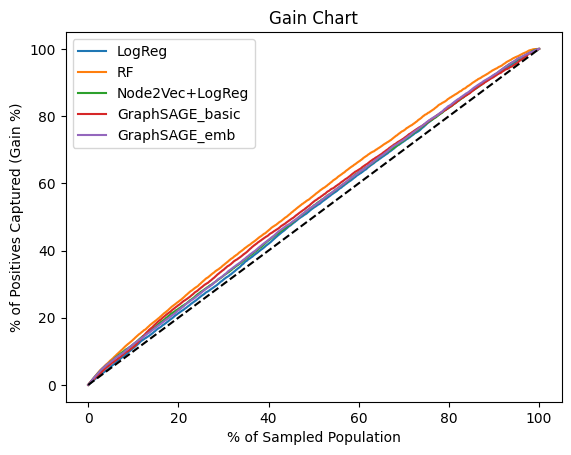

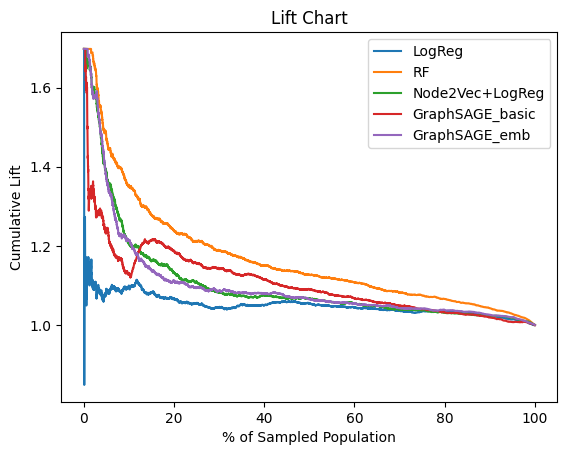

In [17]:
# --- Final comparison incl. GraphSAGE (embeddings) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import ttest_rel
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# ---------- 0) Utility: align arrays to the same length (safety) ----------
def align_triplet(y_true, y_pred, y_prob):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    y_prob = np.asarray(y_prob).ravel()
    n = min(len(y_true), len(y_pred), len(y_prob))
    return y_true[:n], y_pred[:n], y_prob[:n]

# ---------- 1) Gather all model outputs ----------
entries = {
    "LogReg":             (y_true,               y_pred_logit,        y_prob_logit),
    "RF":                 (y_true,               y_pred_rf,           y_prob_rf),
    "Node2Vec+LogReg":    (y_true,               y_pred_gnn,          y_prob_gnn),
    "GraphSAGE_basic":    (y_true_real,          y_pred_gnn_real,     y_prob_gnn_real),
    "GraphSAGE_emb":      (y_true_embedded,      y_pred_gnn_embedded, y_prob_gnn_embedded),
}

# Align and compute metrics
metrics = {}
aligned = {}
for name, (yt, yp, pr) in entries.items():
    yt, yp, pr = align_triplet(yt, yp, pr)
    aligned[name] = (yt, yp, pr)
    metrics[name] = {
        "roc_auc": roc_auc_score(yt, pr),
        "precision": precision_score(yt, yp),
        "recall": recall_score(yt, yp),
        "f1": f1_score(yt, yp),
        "n_test": len(yt),
    }

print("\nModel Metrics Comparison")
for k, v in metrics.items():
    print(f"{k}: {v}")

# ---------- 2) Statistical tests ----------
def mcnemar_compare(name_a, name_b):
    yt_a, yp_a, _ = aligned[name_a]
    yt_b, yp_b, _ = aligned[name_b]
    # Must use the same y_true for both; align lengths again to be safe
    n = min(len(yt_a), len(yt_b))
    yt_a, yp_a = yt_a[:n], yp_a[:n]
    yt_b, yp_b = yt_b[:n], yp_b[:n]
    # Build 2x2 table of disagreements (correct/incorrect)
    a_correct = (yp_a == yt_a)
    b_correct = (yp_b == yt_b)
    table = [[np.sum(a_correct & b_correct),
              np.sum((~a_correct) & b_correct)],
             [np.sum(a_correct & (~b_correct)),
              np.sum((~a_correct) & (~b_correct))]]
    return mcnemar(table, exact=False, correction=True)

def paired_t_compare(name_a, name_b):
    yt_a, _, pr_a = aligned[name_a]
    yt_b, _, pr_b = aligned[name_b]
    n = min(len(pr_a), len(pr_b))
    return ttest_rel(pr_a[:n], pr_b[:n])

print("\nMcNemar Tests (edge-accuracy differences)")
print("GraphSAGE_basic vs LogReg:", mcnemar_compare("GraphSAGE_basic", "LogReg"))
print("GraphSAGE_emb   vs LogReg:", mcnemar_compare("GraphSAGE_emb",   "LogReg"))
print("GraphSAGE_basic vs RF    :", mcnemar_compare("GraphSAGE_basic", "RF"))
print("GraphSAGE_emb   vs RF    :", mcnemar_compare("GraphSAGE_emb",   "RF"))

print("\nPaired t-tests (probability distributions)")
print("GraphSAGE_basic vs LogReg:", paired_t_compare("GraphSAGE_basic", "LogReg"))
print("GraphSAGE_emb   vs LogReg:", paired_t_compare("GraphSAGE_emb",   "LogReg"))
print("GraphSAGE_basic vs RF    :", paired_t_compare("GraphSAGE_basic", "RF"))
print("GraphSAGE_emb   vs RF    :", paired_t_compare("GraphSAGE_emb",   "RF"))

# ---------- 3) 95% bootstrap CI for ROC-AUC ----------
def bootstrap_auc_ci(y_true, y_prob, n_boot=1000, seed=42):
    rng = np.random.default_rng(seed)
    n = len(y_true)
    aucs = []
    yt = pd.Series(y_true)
    pr = np.asarray(y_prob)
    for _ in range(n_boot):
        idx = rng.choice(n, n, replace=True)
        aucs.append(roc_auc_score(yt.iloc[idx], pr[idx]))
    lo, hi = np.percentile(aucs, [2.5, 97.5])
    return float(lo), float(hi)

print("\n95% ROC-AUC Confidence Intervals (bootstrap)")
for name, (yt, _, pr) in aligned.items():
    lo, hi = bootstrap_auc_ci(yt, pr, n_boot=1000)
    print(f"{name}: [{lo:.3f}, {hi:.3f}]")

# ---------- 4) Precision@K & Recall@K ----------
def precision_recall_at_k(y_true, y_prob, k):
    df = pd.DataFrame({"y": y_true, "p": y_prob}).sort_values("p", ascending=False)
    k = int(min(k, len(df)))
    topk = df.head(k)
    precision = topk["y"].sum() / k if k > 0 else 0.0
    recall = topk["y"].sum() / df["y"].sum() if df["y"].sum() > 0 else 0.0
    return float(precision), float(recall)

# Evaluate at two K's: top 10% and top 1000 (if available)
for name, (yt, _, pr) in aligned.items():
    K10 = int(0.10 * len(yt))
    p10, r10 = precision_recall_at_k(yt, pr, K10)
    K1k = 1000
    p1k, r1k = precision_recall_at_k(yt, pr, K1k)
    print(f"\n{name} @Top10% (K={K10}): Precision={p10:.3f}, Recall={r10:.3f}")
    print(f"{name} @Top1000:          Precision={p1k:.3f}, Recall={r1k:.3f}")

# ---------- 5) Gain & Lift charts ----------
def plot_gain(y_true, y_prob, label):
    df = pd.DataFrame({"y": y_true, "p": y_prob}).sort_values("p", ascending=False).reset_index(drop=True)
    df["cum_pos"] = df["y"].cumsum()
    total_pos = df["y"].sum()
    df["perc_obs"] = (np.arange(1, len(df)+1) / len(df)) * 100.0
    df["gain"] = (df["cum_pos"] / total_pos) * 100.0
    plt.plot(df["perc_obs"], df["gain"], label=label)

def plot_lift(y_true, y_prob, label):
    df = pd.DataFrame({"y": y_true, "p": y_prob}).sort_values("p", ascending=False).reset_index(drop=True)
    df["cum_pos"] = df["y"].cumsum()
    total_pos = df["y"].sum()
    base_rate = total_pos / len(df) if len(df) > 0 else 0.0
    df["pop_perc"] = (np.arange(1, len(df)+1) / len(df))
    # Lift = (cum_pos / k) / base_rate
    df["lift"] = (df["cum_pos"] / (np.arange(1, len(df)+1))) / base_rate if base_rate > 0 else 1.0
    plt.plot(df["pop_perc"]*100.0, df["lift"], label=label)

plt.figure()
for name, (yt, _, pr) in aligned.items():
    plot_gain(yt, pr, name)
plt.plot([0,100], [0,100], 'k--')
plt.xlabel("% of Sampled Population")
plt.ylabel("% of Positives Captured (Gain %)")
plt.title("Gain Chart")
plt.legend()
plt.show()

plt.figure()
for name, (yt, _, pr) in aligned.items():
    plot_lift(yt, pr, name)
plt.xlabel("% of Sampled Population")
plt.ylabel("Cumulative Lift")
plt.title("Lift Chart")
plt.legend()
plt.show()
